#                                                         Problem Definition

## The goal of this project is to build a machine learning model that predicts whether a person is at risk of heart disease.
## The model uses patient medical information such as age, gender, height, weight, cholesterol level, blood pressure, and lifestyle factors.

#### Task - 1 : Problem statement, dataset summary, and ini al observa ons.

## 1. Importing all the libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the dataset

In [63]:
df = pd.read_csv("D:\\Tanisha\\3rd year\\Sem-6\\MLDL\\Project\\archive\\cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [64]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 3. basic information of dataset 

In [65]:
df.shape

(70000, 13)

In [66]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [67]:
# give overall information of dataset with memory usage and all 
df.info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       

In [68]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [69]:
# give statastical information of only numeric value
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [71]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [72]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

## 4. Target column 

In [73]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [74]:
df.isna().mean()*100

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

In [75]:
df.duplicated().sum()

0

In [48]:
df.corr()

,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,BMI,high_bp,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
height,1.000000,0.306760,0.017770,0.035872,0.194767,0.098195,-0.008036,-0.011864,-0.085500,-0.208487,-0.011467,0.053420,-0.027242,-0.043351,0.022414,-0.015190,-0.015198
weight,0.306760,1.000000,0.268895,0.252272,0.066982,0.068467,-0.017847,0.179886,0.054686,0.860693,0.230507,-0.137229,0.067481,0.114050,-0.120487,0.095156,0.068385
ap_hi,0.017770,0.268895,1.000000,0.711043,0.027361,0.033715,-0.001568,0.425542,0.208129,0.265397,0.749962,-0.191525,0.099583,0.153373,-0.102474,0.076094,0.062930
ap_lo,0.035872,0.252272,0.711043,1.000000,0.025600,0.040762,0.000097,0.339333,0.154627,0.239233,0.700566,-0.154942,0.073618,0.131536,-0.082887,0.061492,0.050959
smoke,0.194767,0.066982,0.027361,0.025600,1.000000,0.340179,0.025398,-0.016138,-0.047615,-0.033533,0.027013,-0.017712,0.024831,-0.002594,-0.001333,0.015747,-0.013731
alco,0.098195,0.068467,0.033715,0.040762,0.340179,1.000000,0.024842,-0.008106,-0.028810,0.017926,0.038893,-0.043146,0.038612,0.017176,-0.019809,0.030412,-0.003317
active,-0.008036,-0.017847,-0.001568,0.000097,0.025398,0.024842,1.000000,-0.037657,-0.010526,-0.015079,0.003495,-0.004905,-0.005378,0.012443,0.009934,-0.010782,-0.002744
cardio,-0.011864,0.179886,0.425542,0.339333,-0.016138,-0.008106,-0.037657,1.000000,0.239230,0.189354,0.412005,-0.205316,0.080288,0.192841,-0.091550,0.052929,0.071064
age_years,-0.085500,0.054686,0.208129,0.154627,-0.047615,-0.028810,-0.010526,0.239230,1.000000,0.101603,0.154272,-0.130127,0.021770,0.153491,-0.088138,0.024817,0.094188
BMI,-0.208487,0.860693,0.265397,0.239233,-0.033533,0.017926,-0.015079,0.189354,0.101603,1.000000,0.239154,-0.165872,0.081036,0.138424,-0.133592,0.104061,0.077249


In [49]:
df.corr()['cardio'].sort_values()

cholesterol_1   -0.205316
gluc_1          -0.091550
active          -0.037657
smoke           -0.016138
height          -0.011864
alco            -0.008106
gluc_2           0.052929
gluc_3           0.071064
cholesterol_2    0.080288
weight           0.179886
BMI              0.189354
cholesterol_3    0.192841
age_years        0.239230
ap_lo            0.339333
high_bp          0.412005
ap_hi            0.425542
cardio           1.000000
Name: cardio, dtype: float64

In [50]:
# Select only numeric features.
df.select_dtypes(include='number')

,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,BMI,high_bp
0,168,62.0,110,80,0,0,1,0,50,21.967120,0
1,156,85.0,140,90,0,0,1,1,55,34.927679,1
2,165,64.0,130,70,0,0,0,1,51,23.507805,0
3,169,82.0,150,100,0,0,1,1,48,28.710479,1
4,156,56.0,100,60,0,0,0,0,47,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,168,76.0,120,80,1,0,1,0,52,26.927438,0
69996,158,126.0,140,90,0,0,1,1,61,50.472681,1
69997,183,105.0,180,90,0,1,0,1,52,31.353579,1
69998,163,72.0,135,80,0,0,0,1,61,27.099251,0


In [51]:
# select only objects
df.select_dtypes(include='object')

""
0
1
2
3
4
...
69995
69996
69997
69998


In [52]:
# check skewness
df.skew()

height           0.024790
weight           0.993762
ap_hi            0.915944
ap_lo            0.458436
smoke            2.908219
alco             3.967567
active          -1.526684
cardio           0.020536
age_years       -0.304516
BMI              1.346636
high_bp          0.658890
cholesterol_1   -1.153941
cholesterol_2    2.130590
cholesterol_3    2.418730
gluc_1          -1.961995
gluc_2           3.261013
gluc_3           3.197958
dtype: float64

In [53]:
# give variance
df.var()

height            62.633267
weight           204.359429
ap_hi            279.557816
ap_lo             90.676782
smoke              0.080275
alco               0.050657
active             0.157964
cardio             0.249977
age_years         45.805318
BMI               27.635084
high_bp            0.225527
cholesterol_1      0.187566
cholesterol_2      0.117108
cholesterol_3      0.101524
gluc_1             0.127402
gluc_2             0.068336
gluc_3             0.070292
dtype: float64

In [54]:
df.mode()

,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,BMI,high_bp,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,165,65.0,120,80,0,0,1,0,55,23.875115,0,True,False,False,True,False,False


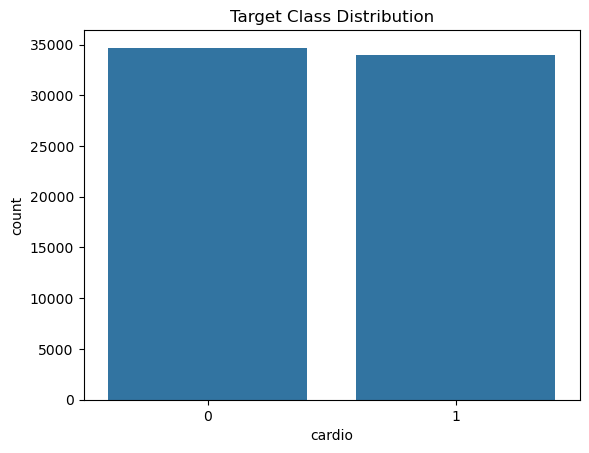

In [55]:
sns.countplot(df, x='cardio')
plt.title("Target Class Distribution")
plt.show()

## 6. EDA (Explonatory Data Analysis)

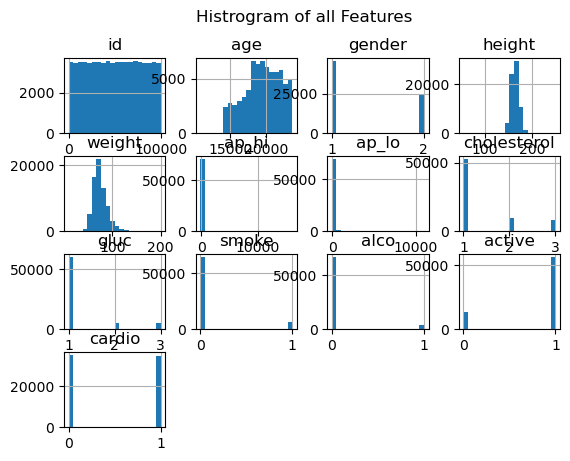

In [79]:
# getting information with ploting histogram

# per column histogram banavse
df.hist(bins=20)
plt.suptitle("Histrogram of all Features")
plt.show()

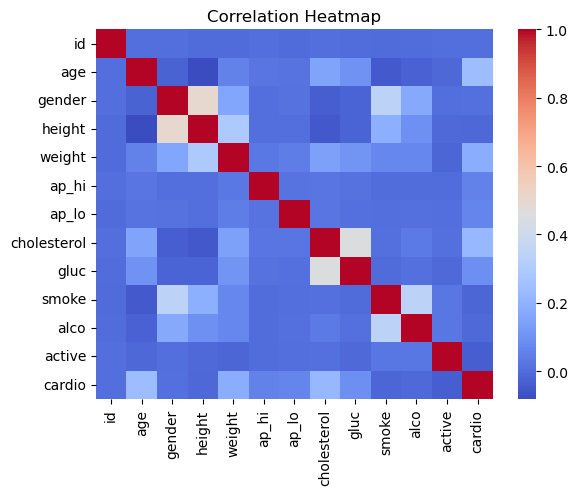

In [80]:
# Correlation matrix
sns.heatmap(df.corr(),annot=False,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

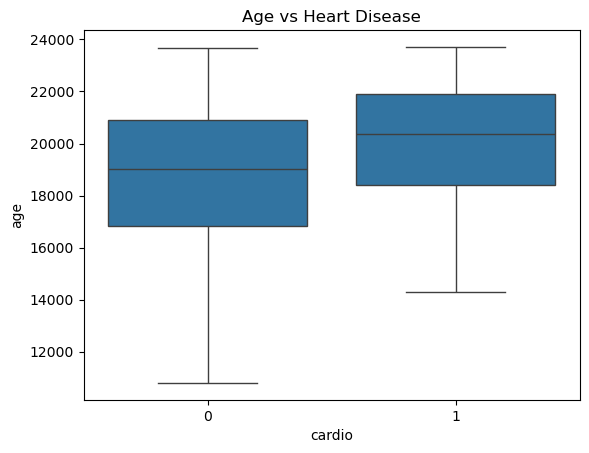

In [83]:
sns.boxplot(x='cardio', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

# Task - 2 :Handle missing values Identify and handle outliers. Encode categorical variables Normalize/scale 
# numerical features. 
# EDA 

In [84]:
df.duplicated(subset=df.columns.difference(['id'])).sum()

24

In [85]:
df = df.drop_duplicates(subset=df.columns.difference(['id']))

In [86]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## handling missing value if exits

In [87]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df.head(5)

C:\Users\Shyamal\AppData\Local\Temp\ipykernel_2008\1645240813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(df[num_cols].median())


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Convert the age into years

In [88]:
df['age_years'] = (df['age'] / 365).astype(int)
df = df.drop(columns=["age"]) 

C:\Users\Shyamal\AppData\Local\Temp\ipykernel_2008\2980903018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_years'] = (df['age'] / 365).astype(int)


In [89]:
df

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61


## Outlier detecting and removing with DBScan

In [ ]:
# from sklearn.cluster import DBSCAN
# import numpy as np

# # Select multiple features
# cols = df[['ap_hi', 'ap_lo', 'height', 'weight', 'age_years']]

# # Run DBSCAN
# db = DBSCAN(eps=1.2 , min_samples=5).fit(cols)

# # Assign cluster labels (-1 = outlier)
# df['cluster'] = db.labels_

# # Count outliers
# print("DBSCAN outliers removed:", (df['cluster'] == -1).sum())

# # Remove outliers (keep only cluster >= 0)
# df = df[df['cluster'] != -1]

# # Drop temporary cluster column
# df = df.drop(columns=['cluster'])

# # Show cleaned data
# df.head()

In [ ]:
# for col in ['height','weight','ap_hi','ap_lo','age_years']:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR

#     df = df[(df[col] >= lower) & (df[col] <= upper)]


In [90]:
df = df[
    (df['height'] >= 120) & (df['height'] <= 220) &
    (df['weight'] >= 30) & (df['weight'] <= 200) &
    (df['ap_hi'] >= 80) & (df['ap_hi'] <= 240) &
    (df['ap_lo'] >= 50) & (df['ap_lo'] <= 150)
]

In [91]:
df.shape

(68641, 13)

In [92]:
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000
mean,49966.581970,1.348888,164.416020,74.124315,126.630542,81.364534,1.364928,1.226017,0.088052,0.053539,0.803368,0.494937,52.829679
std,28846.283977,0.476622,7.915168,14.296908,16.722345,9.523969,0.679108,0.571970,0.283373,0.225108,0.397454,0.499978,6.768299
min,0.000000,1.000000,120.000000,30.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24995.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50005.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74859.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,207.000000,200.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


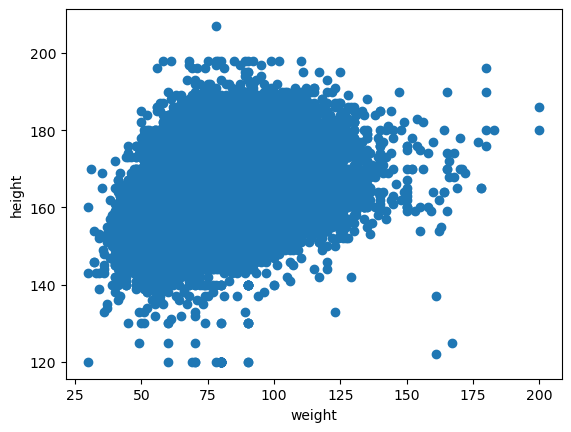

In [93]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

## Feature engineering

In [95]:
# create new column bmi
df['BMI'] = df['weight'] / ((df['height']/100)**2)

# high bp indicator
df['high_bp']=((df['ap_hi'] >= 140) | (df['ap_lo'] >= 90)).astype(int)

print(df['BMI'])
print(df['high_bp'])

cols_to_drop = [c for c in ['id','gender'] if c in df.columns]
df = df.drop(columns=cols_to_drop)

df


0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: BMI, Length: 68641, dtype: float64
0        0
1        1
2        0
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    0
Name: high_bp, Length: 68641, dtype: int32


C:\Users\Shyamal\AppData\Local\Temp\ipykernel_2008\4030341397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['weight'] / ((df['height']/100)**2)
C:\Users\Shyamal\AppData\Local\Temp\ipykernel_2008\4030341397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_bp']=((df['ap_hi'] >= 140) | (df['ap_lo'] >= 90)).astype(int)


,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,high_bp
0,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,0
1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,1
2,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,0
3,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,1
4,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,0
69996,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,1
69997,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,1
69998,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,0


## Encode Categorical columns

In [96]:
df = pd.get_dummies(df, columns=['cholesterol', 'gluc'])
df.head()

,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,BMI,high_bp,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,168,62.0,110,80,0,0,1,0,50,21.967120,0,True,False,False,True,False,False
1,156,85.0,140,90,0,0,1,1,55,34.927679,1,False,False,True,True,False,False
2,165,64.0,130,70,0,0,0,1,51,23.507805,0,False,False,True,True,False,False
3,169,82.0,150,100,0,0,1,1,48,28.710479,1,True,False,False,True,False,False
4,156,56.0,100,60,0,0,0,0,47,23.011177,0,True,False,False,True,False,False


## Scaling numerical features

In [97]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'age_years']
scaler = StandardScaler()

# df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.head()


,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,BMI,high_bp,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,168,62.0,110,80,0,0,1,0,50,21.967120,0,True,False,False,True,False,False
1,156,85.0,140,90,0,0,1,1,55,34.927679,1,False,False,True,True,False,False
2,165,64.0,130,70,0,0,0,1,51,23.507805,0,False,False,True,True,False,False
3,169,82.0,150,100,0,0,1,1,48,28.710479,1,True,False,False,True,False,False
4,156,56.0,100,60,0,0,0,0,47,23.011177,0,True,False,False,True,False,False


## Train - test data spliting

In [98]:
from sklearn.model_selection import train_test_split

X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(len(X_train), len(X_test))


54912 13729


In [99]:
X_train.head(5)

,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,BMI,high_bp,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
49359,164,79.0,130,90,0,0,1,57,29.372397,1,False,False,True,False,False,True
4922,160,62.0,120,70,0,0,1,49,24.218750,0,True,False,False,True,False,False
48098,164,68.0,130,90,0,0,1,52,25.282570,1,True,False,False,True,False,False
22766,165,123.0,150,90,0,0,1,54,45.179063,1,False,False,True,False,False,True
9938,153,76.0,150,90,0,0,1,50,32.466145,1,True,False,False,True,False,False


In [ ]:
X_test.head(5)

,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,BMI,high_bp,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
19722,163,82.0,140,90,0,1,1,59,30.863036,1,True,False,False,True,False,False
10487,164,71.0,110,80,0,0,1,39,26.397977,0,True,False,False,True,False,False
52636,151,72.0,130,80,0,0,1,64,31.577562,0,False,False,True,False,False,True
14466,158,74.0,120,80,0,0,1,63,29.642685,0,False,True,False,False,False,True
65464,157,72.0,110,70,0,0,1,51,29.210110,0,True,False,False,True,False,False


## saving processed data

In [100]:
df.to_csv("processed_week2_data.csv", index=False)